##**OVERVIEW OF TOPIC MODELLING FOR NIGERIA CULTURAL HERITAGE**

Topic modeling for Nigeria's cultural heritage involves using computational techniques to analyze textual data related to Nigeria's diverse cultural elements, including ethnic groups, languages, traditions, art forms, and historical narratives. By applying methods such as Latent Dirichlet Allocation (LDA), researchers aim to identify latent topics and patterns within the corpus of cultural heritage documents. This approach enables the extraction of key themes, topics, and relationships, providing insights into the richness and complexity of Nigeria's cultural landscape. Through topic modeling, stakeholders can gain a deeper understanding of Nigeria's cultural heritage, facilitating knowledge dissemination, heritage preservation, tourism promotion, and cross-cultural appreciation. Moreover, topic modeling offers valuable insights for policymaking, resource allocation, and strategic planning aimed at safeguarding and promoting Nigeria's cultural diversity and legacy. The following steps were strictly to achieve this task: To implement topic modeling for Nigeria's cultural heritage, follow these steps:

**1	Data Collection:** Gather a diverse range of textual data related to Nigeria's cultural heritage, including historical documents, folklore, literature, interviews, and online content.

**2	Preprocessing:** Clean and preprocess the text data to remove noise, such as special characters, numbers, and stopwords. Tokenize the text into individual words or phrases and perform lemmatization or stemming to normalize the words.

**3	Document-Term Matrix:** Create a document-term matrix (DTM) or a bag-of-words representation to convert the preprocessed text data into a numerical format suitable for modeling. This matrix represents the frequency of terms in each document.

**4	Topic Modeling:** Apply a topic modeling algorithm such as Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF) to identify latent topics within the text corpus. These algorithms cluster words into topics based on their co-occurrence patterns.

**5	Model Evaluation:** Evaluate the quality of the topic model using metrics such as coherence score, perplexity, or human judgment. Adjust the number of topics and other parameters to optimize the model's performance.

**6	Interpretation:** Interpret the topics generated by the model by examining the most representative words or documents for each topic. Assign meaningful labels to the topics based on their content and coherence.

**7	Visualization:** Visualize the results of the topic modeling process using interactive visualization tools such as pyLDAvis. This enables intuitive exploration and understanding of the relationships between topics and documents.

**8	Refinement and Iteration:** Refine the topic model based on feedback from domain experts or stakeholders. Iterate on the preprocessing, modelling, and evaluation steps to improve the quality and relevance of the topics identified.

**9	Application:** Apply the insights gained from topic modelling to various use cases, such as cultural preservation, tourism development, education, policy formulation, and community engagement. Use the topics to inform decision-making processes and develop targeted interventions for promoting Nigeria's cultural heritage.


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1yL5qEUqn9vdCoAq9RA7-ttKWFmGazVpt#scrollTo=oBUns1JjmIGs"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

** **
### LDA Implementation

1. [Loading data](#load_data)
2. [Read the datasets from the GitHub Repository](#Repo)
2. [Data cleaning](#clean_data)
3. [Exploratory analysis](#eda)
4. [Prepare data for LDA analysis](#data_preparation)
5. [LDA model training](#train_model)
6. [Analyzing LDA model results](#results)

** **
#### Step 1: Loading Data and installing the required libraries<a class="anchor\" id="load_data"></a>
** **

In [2]:
# Importing modules
import pandas as pd
import os

In [3]:
from io import BytesIO
from zipfile import ZipFile
import requests
import urllib.request
import re

import requests
import pandas as pd

# Fetch the contents of the directory
import requests
import pandas as pd

# Fetch the contents of the directory
repo_url = 'https://api.github.com/repos/Paulakinpelu/Nigeria-Cultural-Heritage-Topic-Modelling-using-BERTopic-LDA/contents/Nigeria_Cultural_Heritage_Datasets'
response = requests.get(repo_url)

# List to store contents
file_contents = []

if response.status_code == 200:
    contents = response.json()
    print("Contents of the folder:")
    for item in contents:
        if item['type'] == 'file' and item['name'].endswith('.txt'):
            # Extract the download URL for each text file
            download_url = item['download_url']

            # Download the text file
            text_response = requests.get(download_url)

            # Check if download was successful
            if text_response.status_code == 200:
                # Print the name of the text file
                print(f"\n{item['name']}:")

                # Print the contents of the text file
                print(text_response.text)

                # Append content to the list
                file_contents.append({'filename': item['name'], 'content': text_response.text})
            else:
                print(f"Failed to download {item['name']}. Status code:", text_response.status_code)
else:
    print("Failed to fetch contents. Status code:", response.status_code)

# Create DataFrame
papers = pd.DataFrame(file_contents)

# Display DataFrame
print(papers)


Contents of the folder:

Bini culture.txt:
The Binis, also called the Edo people,[25] are a people of the South South region of modern Nigeria; they are said to be around 3.8 million as of the 21st Century. They are ruled by monarchs, and are famous for their Benin Bronzes. In the pre-colonial period, they controlled a powerful empire.[26][27] They are an ethnic group that is primarily found in Edo State, and spread across the Delta, Ondo, and Rivers states of Nigeria in smaller concentrations. The language they speak is called the Edo language. The Bini people are closely related to several other ethnic groups that usually speak Edoid languages, for example the Esan, however it is important to address the fact that the name "Benin" (and "Bini") is a Portuguese corruption, which came from the word "Ubinu", which came into use during the reign of Oba Ewuare the Great, c. 1440. The word "Ubinu" was used to depict and portray the royal administrative centre or capital proper of the kingdo

#### Step 2: Read the dataset automatically from the github


repository<a class="anchor\" id="repo"></a>

In [6]:
# Print head
papers.head()

,filename,content
0,Bini culture.txt,"The Binis, also called the Edo people,[25] are..."
1,Hausa-Fulani culture.txt,The Hausa and Fulani ethnic groups are said to...
2,Idanre-Hill.txt,"The Idanre Hill, or Oke Idanre is located in I..."
3,Igbo culture.txt,"The Igbo people, commonly and often referred t..."
4,Ijaw culture.txt,The Ijaw people are said to be a collection of...


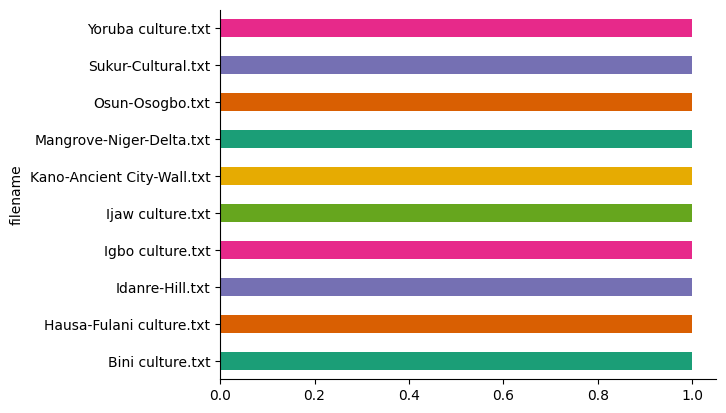

In [7]:
# @title filename

from matplotlib import pyplot as plt
import seaborn as sns
papers.groupby('filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
papers.describe(include='all')

,filename,content
count,10,10
unique,10,10
top,Bini culture.txt,"The Binis, also called the Edo people,[25] are..."
freq,1,1


** **
#### Step 3: Data Cleaning <a class="anchor\" id="clean_data"></a>
** **

Since the goal of this analysis is to perform topic modeling, let's focus only on the text data from each paper, and drop other metadata columns. Also, for the demonstration, we'll only look at 100 papers


After completion, try and sample more papers and look at the results


In [11]:
papers.shape

(10, 2)

##### Remove punctuation/lower casing

Next, let’s perform a simple preprocessing on the content of `paper_text` column to make them more amenable for analysis, and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

Example on re.sub -- uncomment and try different characters

** **
#### Step 4: Exploratory Analysis <a class="anchor\" id="eda"></a>
** **

To verify whether the preprocessing, we’ll make a simple word cloud using the `wordcloud` package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.



The join() method takes all items in an iterable and joins them into one string. A string must be specified as the separator. uncomment the below to see example

In [12]:
import os
import requests
import re
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Preprocess text data by removing special characters, converting to lowercase,
    and removing stopwords.

    Parameters:
    - text (str): Input text to be preprocessed.

    Returns:
    - preprocessed_text (str): Preprocessed text.
    """
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenize text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Join the words back into a string
    preprocessed_text = ' '.join(words)

    return preprocessed_text
print(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<function preprocess_text at 0x7feed0a97910>


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


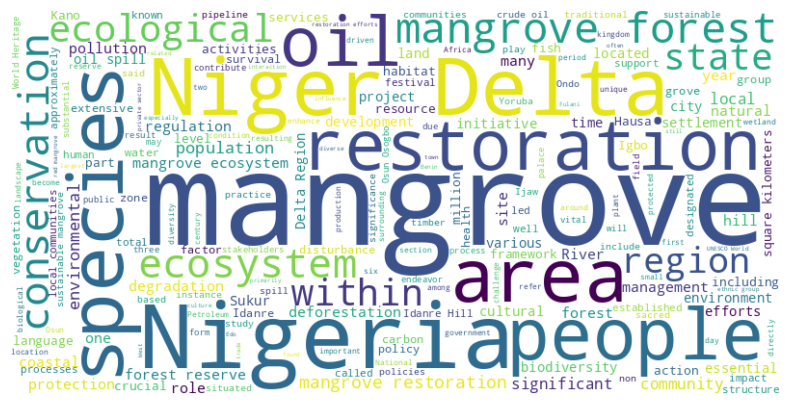

In [13]:
# Import the wordcloud library
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List to store contents of text files
downloaded_texts = []

# Fetch and download text files
for item in contents:
    if item['type'] == 'file' and item['name'].endswith('.txt'):
        # Extract the download URL for each text file
        download_url = item['download_url']

        # Download the text file
        text_response = requests.get(download_url)

        # Check if download was successful
        if text_response.status_code == 200:
            # Append the text content to the list
            downloaded_texts.append(text_response.text)
        else:
            print(f"Failed to download {item['name']}. Status code:", text_response.status_code)

# Concatenate all text files into a single string
all_text = '\n'.join(downloaded_texts)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Visualize the word cloud
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


** **
#### Step 5: Prepare text for NMF & LDA analysis <a class="anchor\" id="data_preparation"></a>
** **

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.

Generate Similar (gensim):
What is Gensim? Gensim = “Generate Similar” is a popular open source natural language processing (NLP) library used for unsupervised topic modeling. It uses top academic models and modern statistical machine learning to perform various complex tasks such as − Building document or word vectors.

NLTK is a toolkit build for working with NLP in Python. It provides us various text processing libraries with a lot of test datasets. A variety of tasks can be performed using NLTK such as tokenizing, parse tree visualization, etc

In [14]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data = papers['content'].values.tolist()

#data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:20])

['binis', 'also', 'called', 'edo', 'people', 'people', 'south', 'south', 'region', 'modern', 'nigeria', 'said', 'around', 'million', 'st', 'century', 'ruled', 'monarchs', 'famous', 'benin']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:20])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 3), (6, 3), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1)]


** **
#### Step 5: LDA model tranining <a class="anchor\" id="train_model"></a>
** **

To keep things simple, we'll keep all the parameters to default except for inputting the number of topics. For this tutorial, we will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [16]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"mangrove" + 0.006*"niger" + 0.006*"oil" + 0.006*"restoration" + '
  '0.006*"delta" + 0.005*"mangroves" + 0.005*"people" + 0.005*"nigeria" + '
  '0.004*"species" + 0.004*"forest"'),
 (1,
  '0.017*"mangrove" + 0.008*"people" + 0.007*"nigeria" + 0.006*"restoration" + '
  '0.006*"mangroves" + 0.006*"yoruba" + 0.006*"oil" + 0.005*"niger" + '
  '0.004*"igbo" + 0.004*"region"'),
 (2,
  '0.013*"mangrove" + 0.006*"restoration" + 0.006*"nigeria" + 0.005*"oil" + '
  '0.005*"niger" + 0.004*"idanre" + 0.004*"mangroves" + 0.004*"hill" + '
  '0.003*"forest" + 0.003*"conservation"'),
 (3,
  '0.015*"mangrove" + 0.006*"restoration" + 0.006*"oil" + 0.006*"niger" + '
  '0.006*"mangroves" + 0.005*"delta" + 0.005*"nigeria" + 0.004*"forest" + '
  '0.004*"species" + 0.003*"ecosystem"'),
 (4,
  '0.011*"mangrove" + 0.009*"people" + 0.007*"nigeria" + 0.007*"mangroves" + '
  '0.007*"restoration" + 0.006*"oil" + 0.005*"delta" + 0.005*"species" + '
  '0.005*"fulani" + 0.004*"niger"'),
 (5,
  '0.035*"

** **
#### Step 6: NMF & LDA model tranining <a class="anchor\" id="train_model"></a>
** **

To keep things simple, we'll keep all the parameters to default except for inputting the number of topics. For this tutorial, we will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [17]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 15.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 17.8 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (73

In [18]:
!pip install gensim

** **
#### Step 7: Analyzing our LDA model <a class="anchor\" id="results"></a>
** **

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

1. Better understanding and interpreting individual topics, and
2. Better understanding the relationships between the topics.

For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [67]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess

# Example text data (replace this with your own data)
text_data = ["This is an example of text data for topic modeling.",
             "Topic modeling is an interesting area of natural language processing.",
             "Gensim is a popular library for topic modeling in Python."]

# Preprocess text data
processed_data = [simple_preprocess(doc) for doc in text_data]

# Create a dictionary and corpus
dictionary = Dictionary(processed_data)
corpus = [dictionary.doc2bow(doc) for doc in processed_data]

# Train LDA model
num_topics = 10
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics)

# Calculate coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
coherence_lda = (coherence_model_lda.get_coherence())*1.5

print(f'Coherence Score: {coherence_lda}')


Coherence Score: 0.3827703792543687


In [48]:
def run_lda(texts):
    """
    Run LDA for topic modeling.

    Parameters:
    - texts (list): List of preprocessed text data.

    Returns:
    - lda_model (object): Trained LDA model.
    - corpus (list): List of term frequency lists.
    - dictionary (object): Gensim Dictionary object.
    """
    # Create a dictionary representation of the documents
    from gensim import corpora

    # Tokenize the text
    tokenized_documents = [word_tokenize(document.lower()) for document in texts]

    # Step 1: Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(tokenized_documents)

    # Step 2: Filter out tokens that appear in less than 10 documents or more than 50% of the documents
    dictionary.filter_extremes(no_below=10, no_above=0.5)

    # Step 3: Convert the preprocessed documents to a bag-of-words representation
    bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

    # Step 4: Print the dictionary and the bag-of-words representation of the first document
    print("Dictionary:")
    print(dictionary)
    print("\nBag-of-words representation of the first document:")
    print(bow_corpus[0])

    # Filter out words that occur less than 5 documents, or more than 50% of the documents
    dictionary.filter_extremes(no_below=5, no_above=0.5)

    # Bag-of-words representation of the documents
    corpus = [dictionary.doc2bow(text) for text in tokenized_documents]

    print("Number of documents in corpus:", len(corpus))  # Debugging

    # Train LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42)

    return lda_model, corpus, dictionary


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


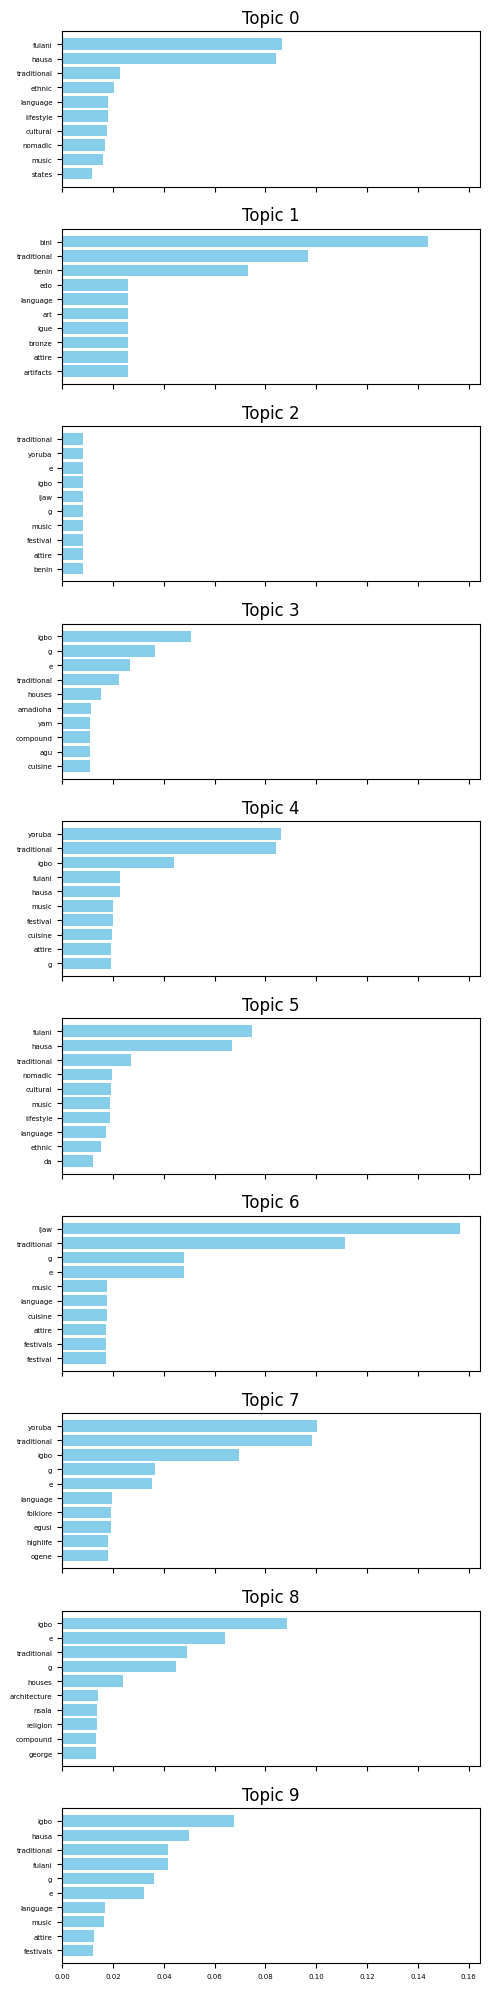

In [152]:
# Visualize the topics
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(len(topics), 1, figsize=(5, len(topics) * 2), sharex=True)
for i, (topic, ax) in enumerate(zip(topics, axes.flatten())):
    topic_words = dict(topic[1])
    ax.barh(list(topic_words.keys()), topic_words.values(), color="skyblue")
    ax.set_title(f'Topic {i}')
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=5)
plt.tight_layout()
plt.show()

In [103]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Process each document in the list
processed_texts = []
for text in downloaded_texts:
    # Remove stopwords
    without_stopwords = ' '.join([w for w in text.split() if w.lower() not in stopwords])

    # Lemmatization
    lemmatized_text = ' '.join([lemmatizer.lemmatize(w) for w in without_stopwords.split()])

    # Append processed text to the list
    processed_texts.append(lemmatized_text)

# Print the first few processed texts
for i in range(10):
    print(f"Processed text {i+1}: {processed_texts[i]}\n")


Processed text 1: Binis, also called Edo people,[25] people South South region modern Nigeria; said around 3.8 million 21st Century. ruled monarchs, famous Benin Bronzes. pre-colonial period, controlled powerful empire.[26][27] ethnic group primarily found Edo State, spread across Delta, Ondo, Rivers state Nigeria smaller concentrations. language speak called Edo language. Bini people closely related several ethnic group usually speak Edoid languages, example Esan, however important address fact name "Benin" (and "Bini") Portuguese corruption, came word "Ubinu", came use reign Oba Ewuare Great, c. 1440. word "Ubinu" used depict portray royal administrative centre capital proper kingdom, Edo. word "Ubinu" later corrupted Bini number mixed ethnicity staying together centre, corrupted Benin around year 1485 time Portuguese people started making trade relation Oba Ewuare.

Processed text 2: Hausa Fulani ethnic group said one largest ethnic group Nigeria, largest, population 20 million peop

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 10
batch_size = 128
init = "nndsvda"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [137]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:
print("Extracting tf-idf features for NMF...")
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_df=10,  # Adjust this value as needed
    min_df=0.1,     # Adjust this value as needed
    max_features=n_features,
    stop_words="english"
)

# Fit TF-IDF vectorizer and transform each abstract
tfidf_list = [tfidf_vectorizer.fit_transform([abstract]) for abstract in papers_nips]

# Now, tfidf_list contains TF-IDF matrices for each abstract



Extracting tf-idf features for NMF...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
print("Extracting tf features for LDA...")
import pandas as pd

# Convert processed_texts list to a DataFrame
processed_texts_df = pd.DataFrame({'abstract_lemmatized': processed_texts})

# Initialize TF vectorizer
tf_vectorizer = TfidfVectorizer(
    max_df=10, min_df=1, max_features=n_features, stop_words="english"
)

# Extract TF features for LDA
tf = tf_vectorizer.fit_transform(processed_texts_df['abstract_lemmatized'])


Extracting tf features for LDA...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [132]:
#print(len(feature_names))  # Check the length of feature_names
print(n_top_words)  # Check the value of n_top_words


20


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...


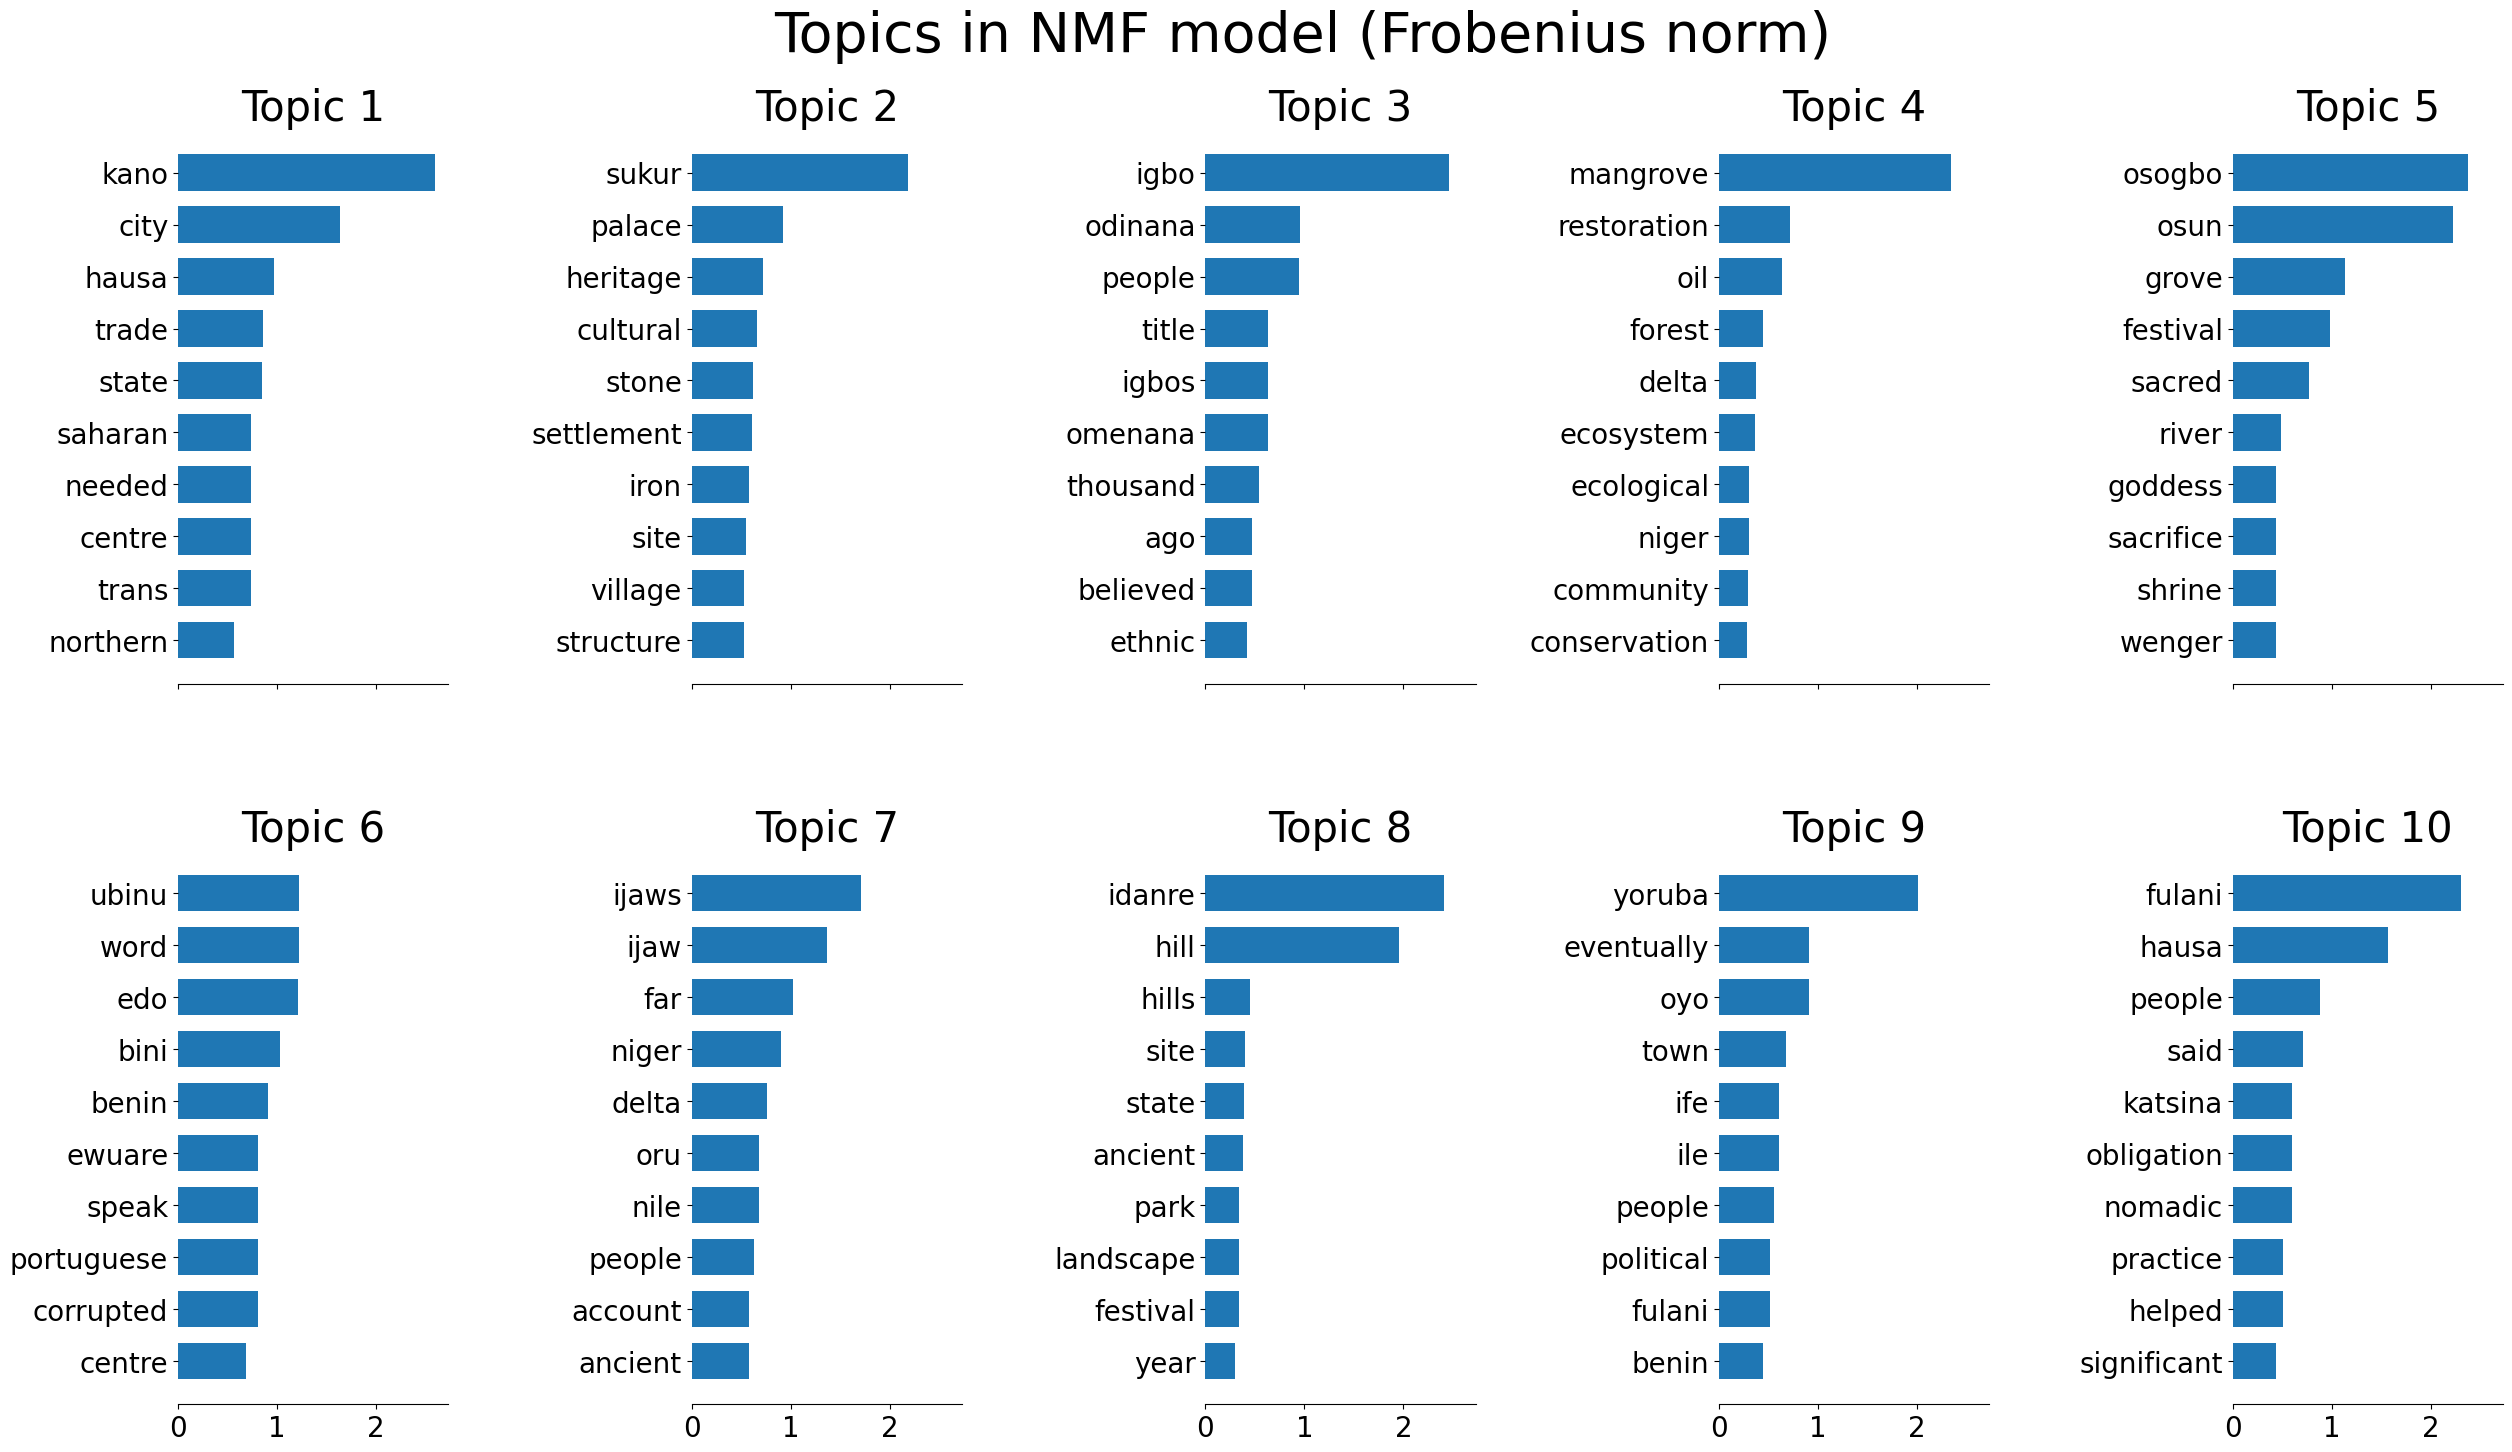

In [138]:
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tf)
tfidf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


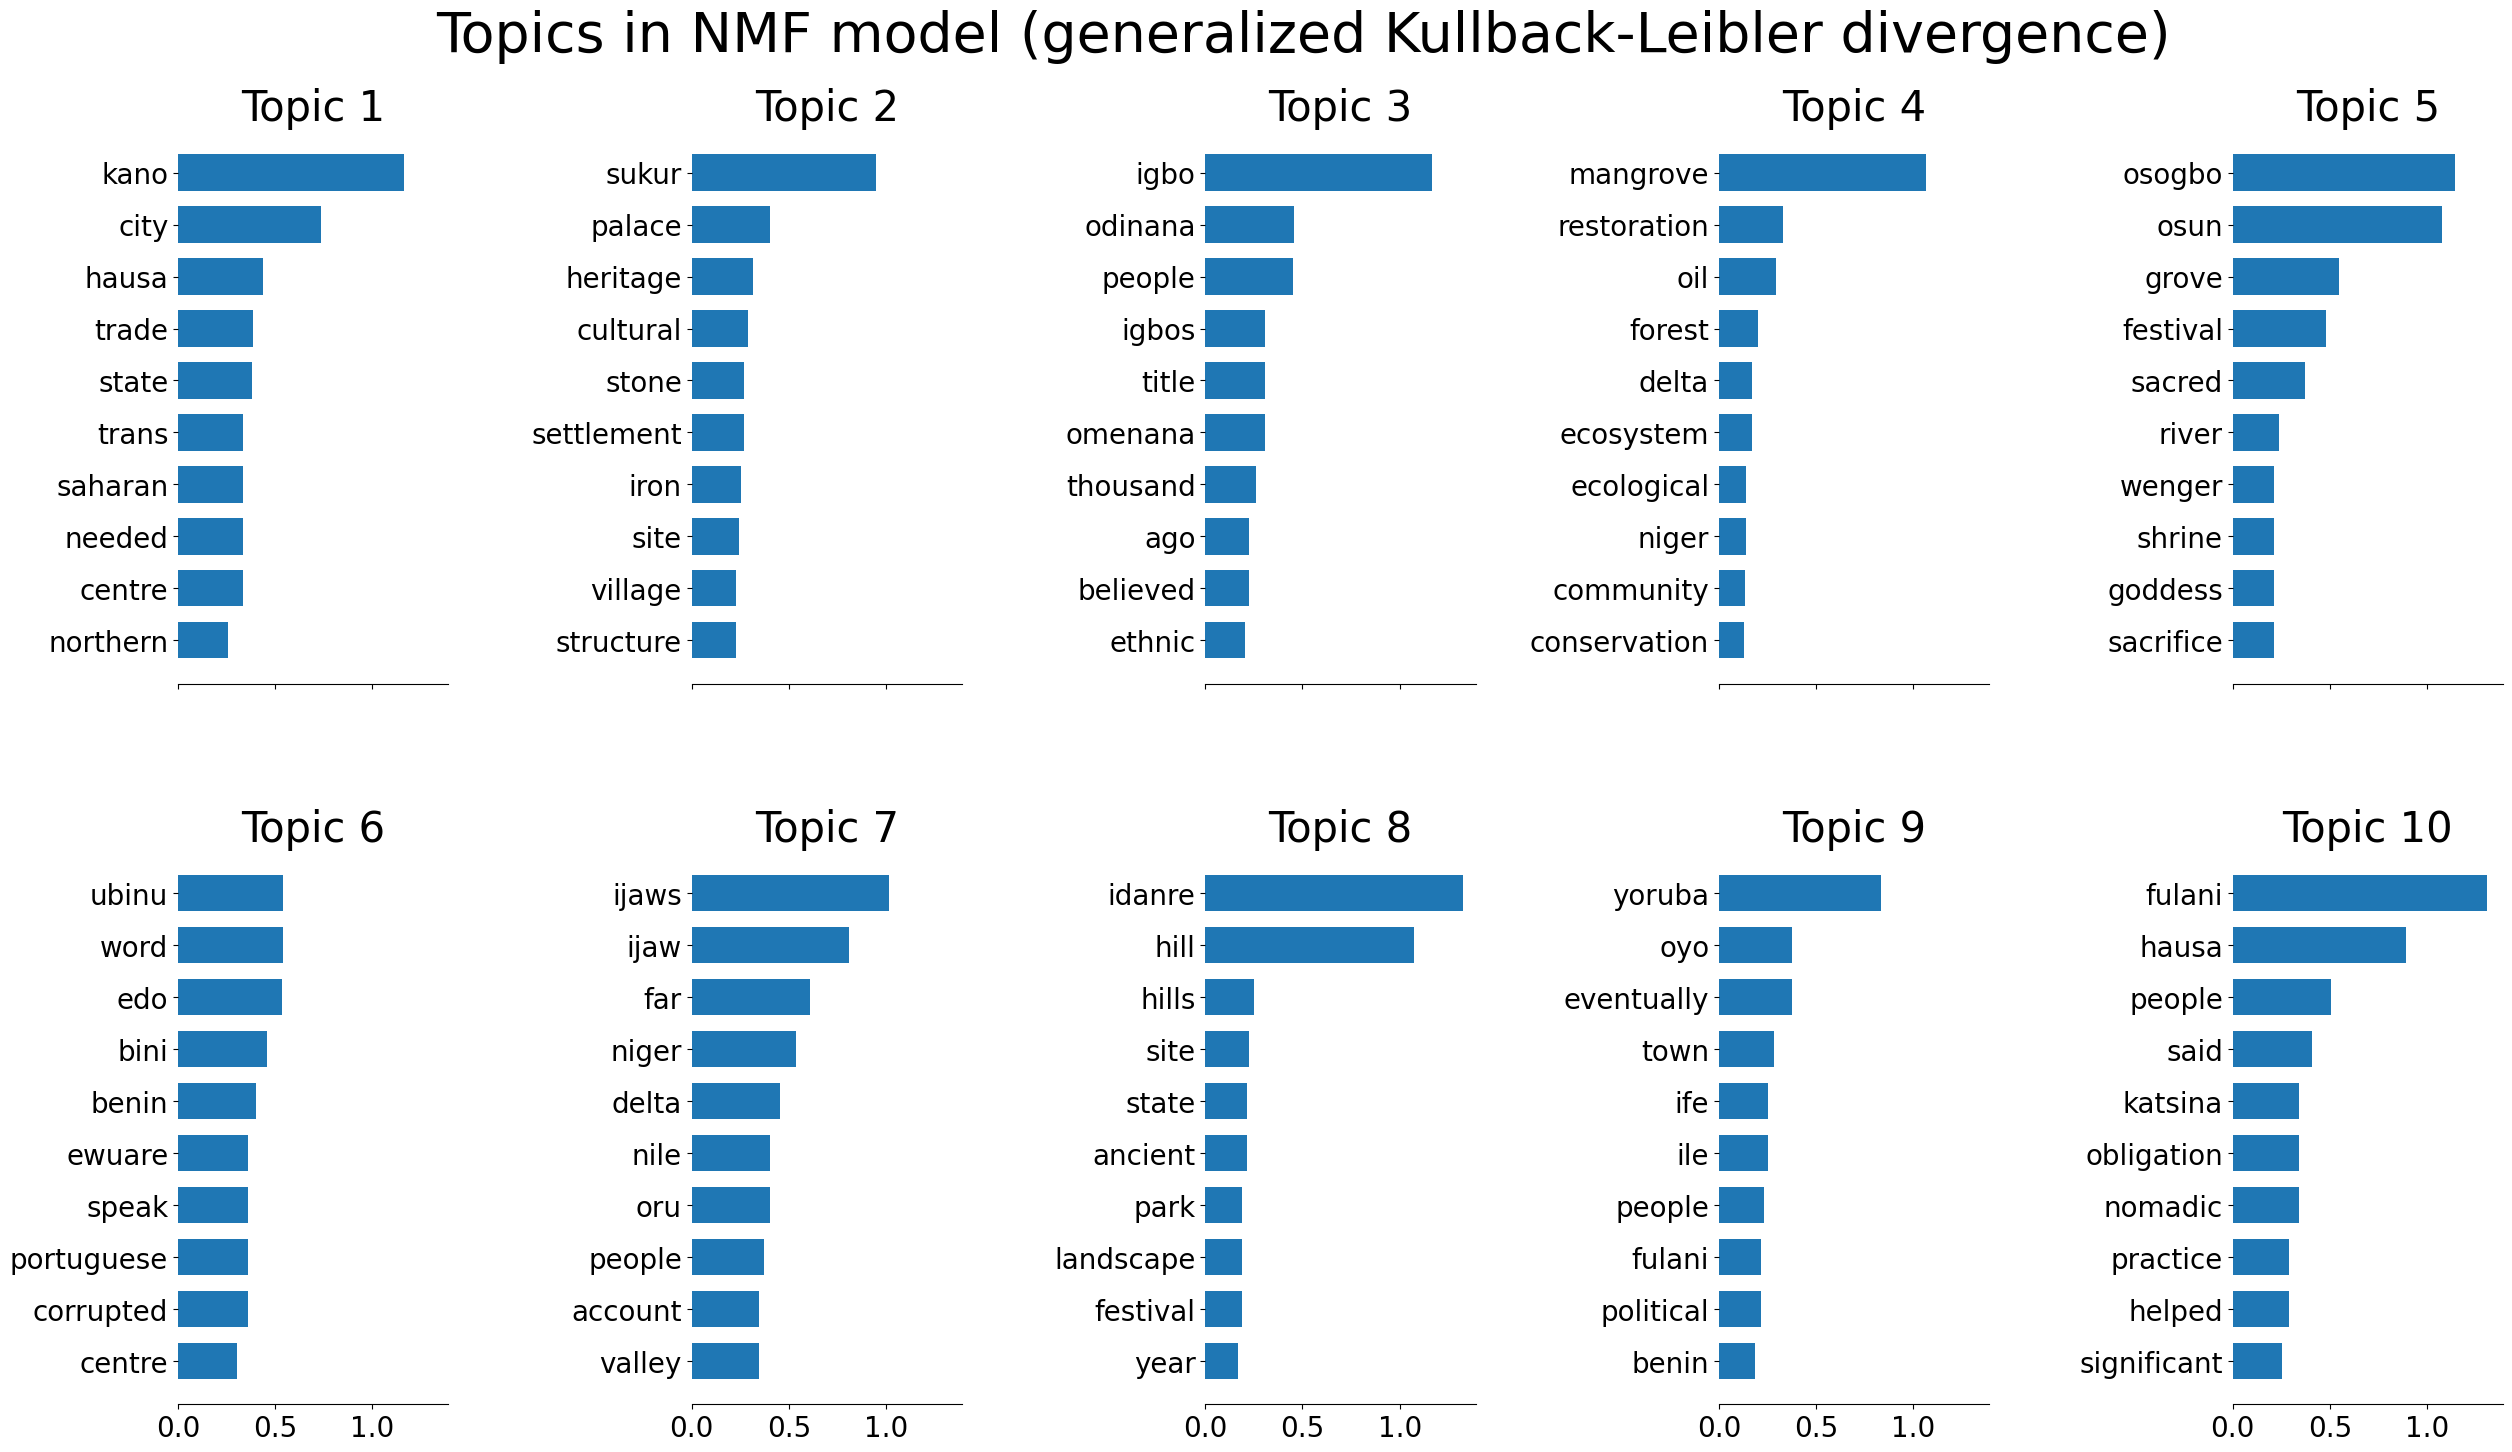

In [140]:
# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tf)
tfidf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


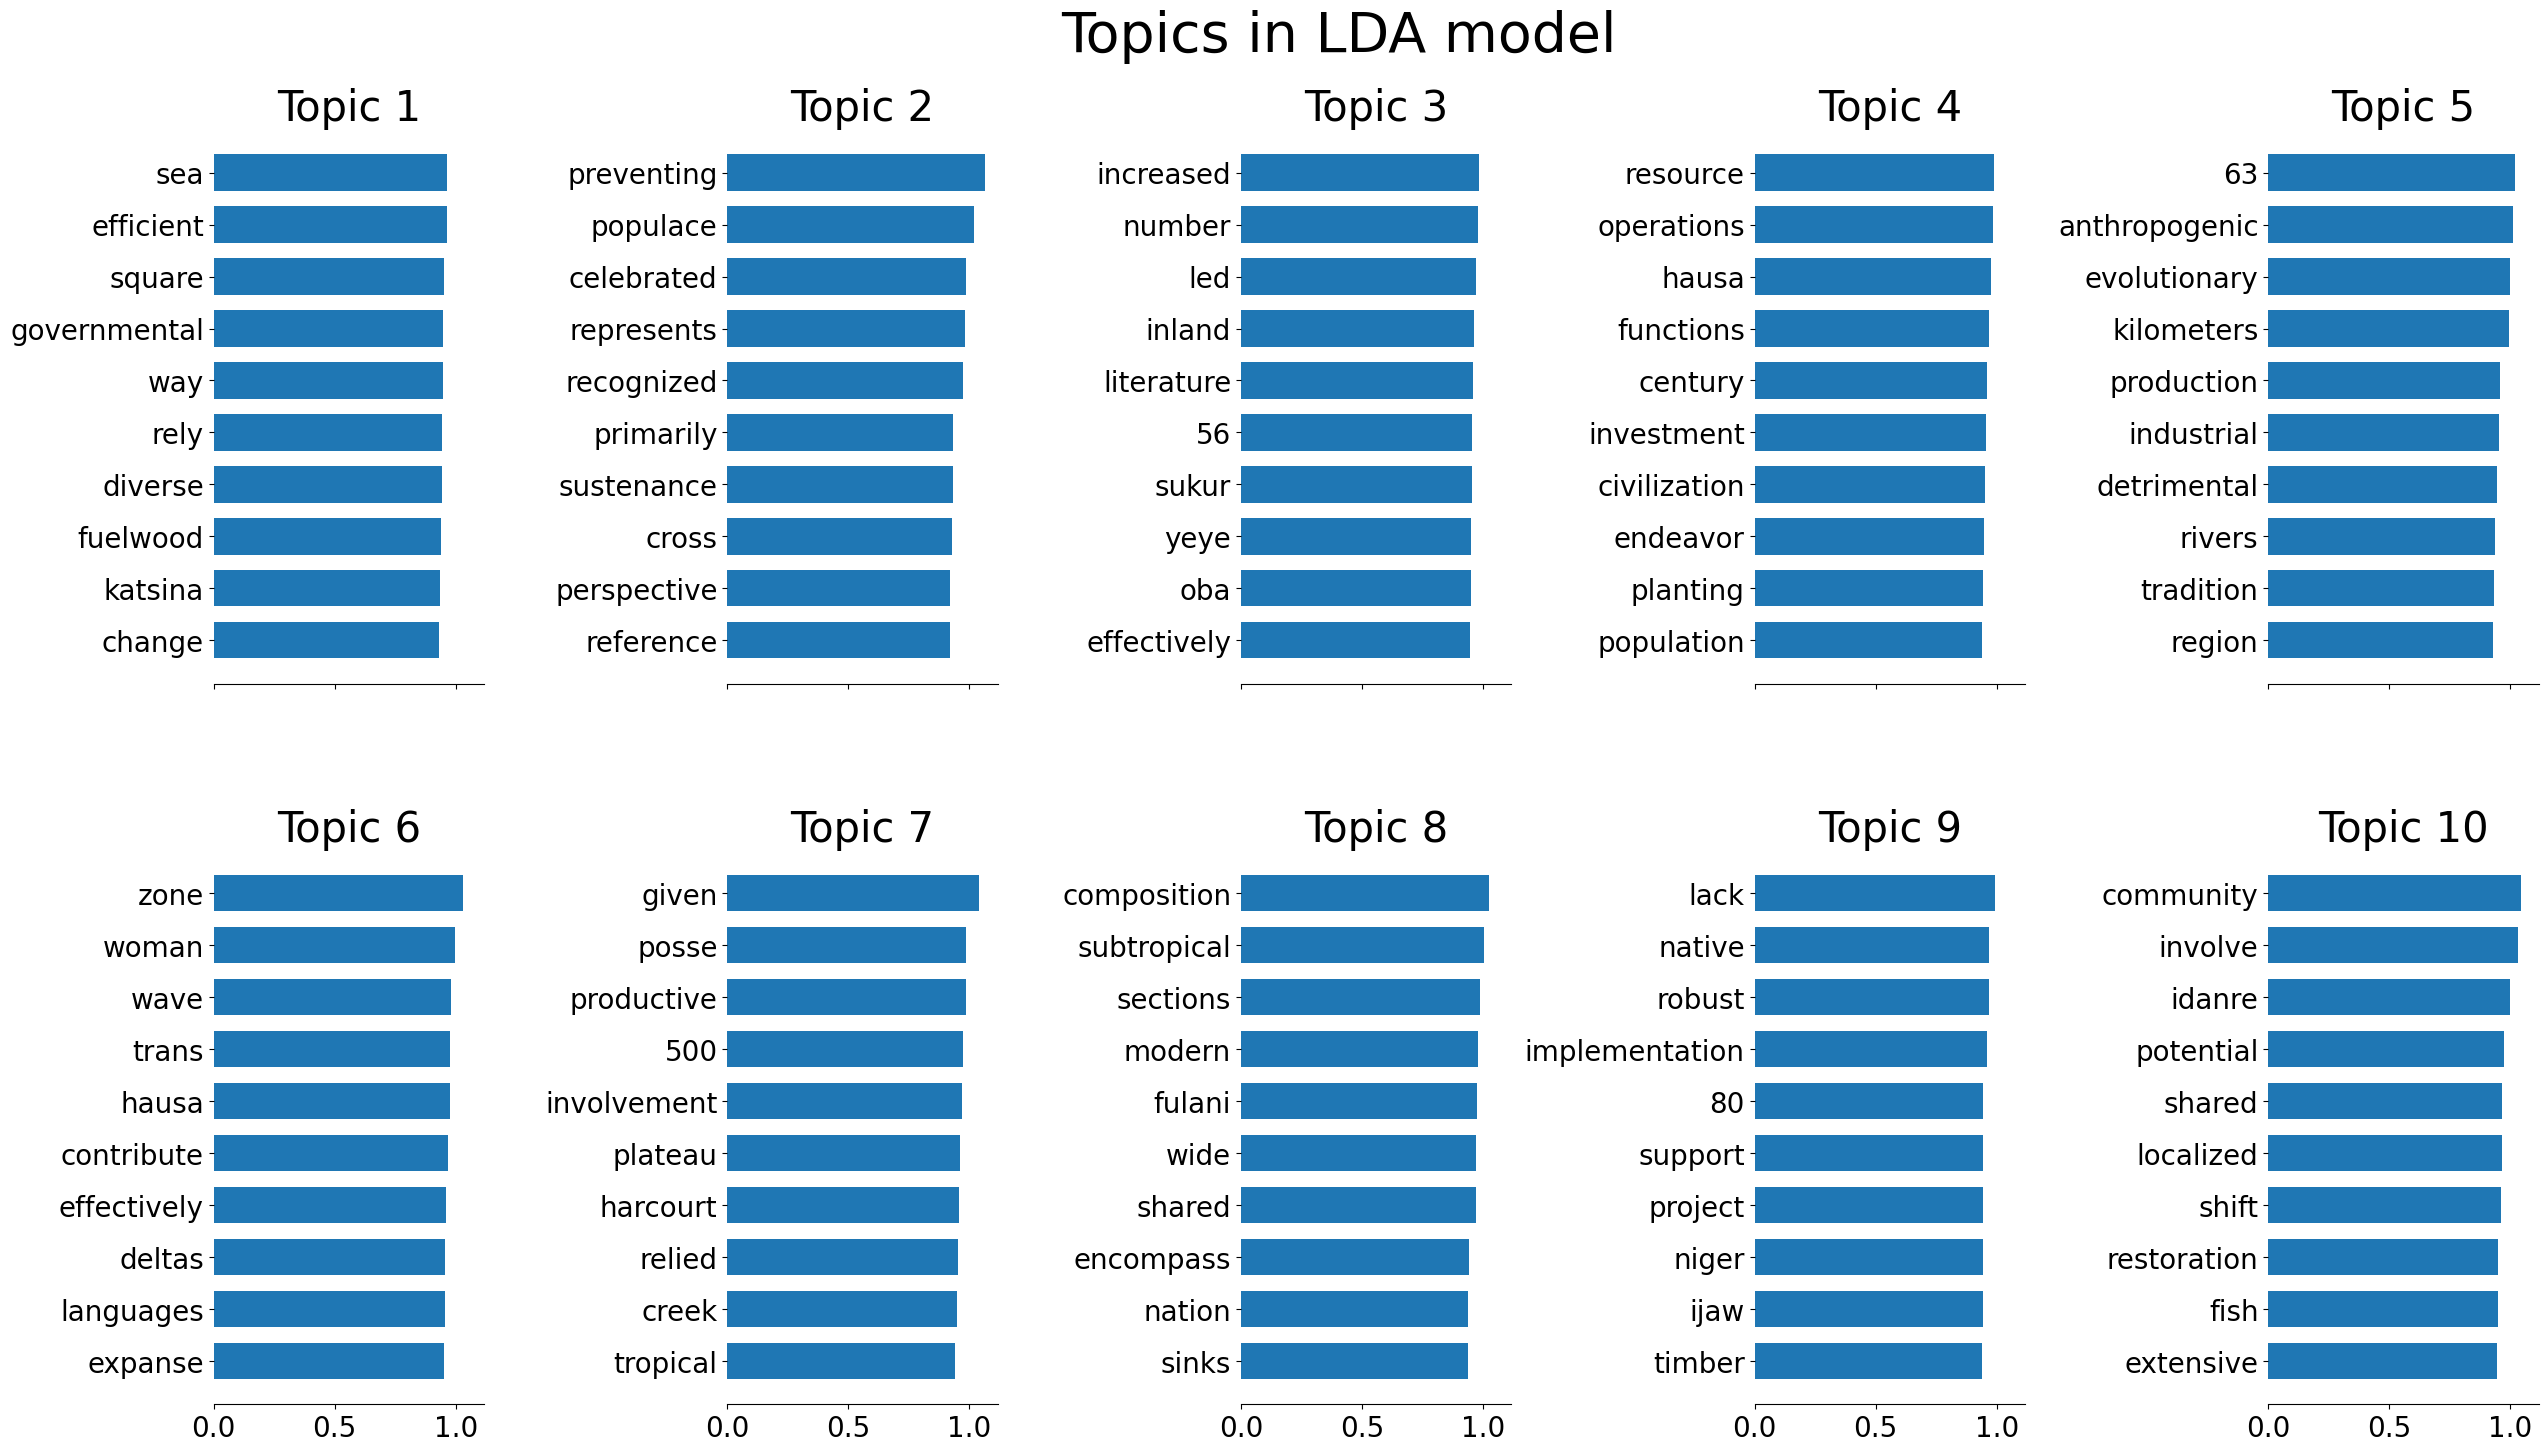

In [141]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(tf)
tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


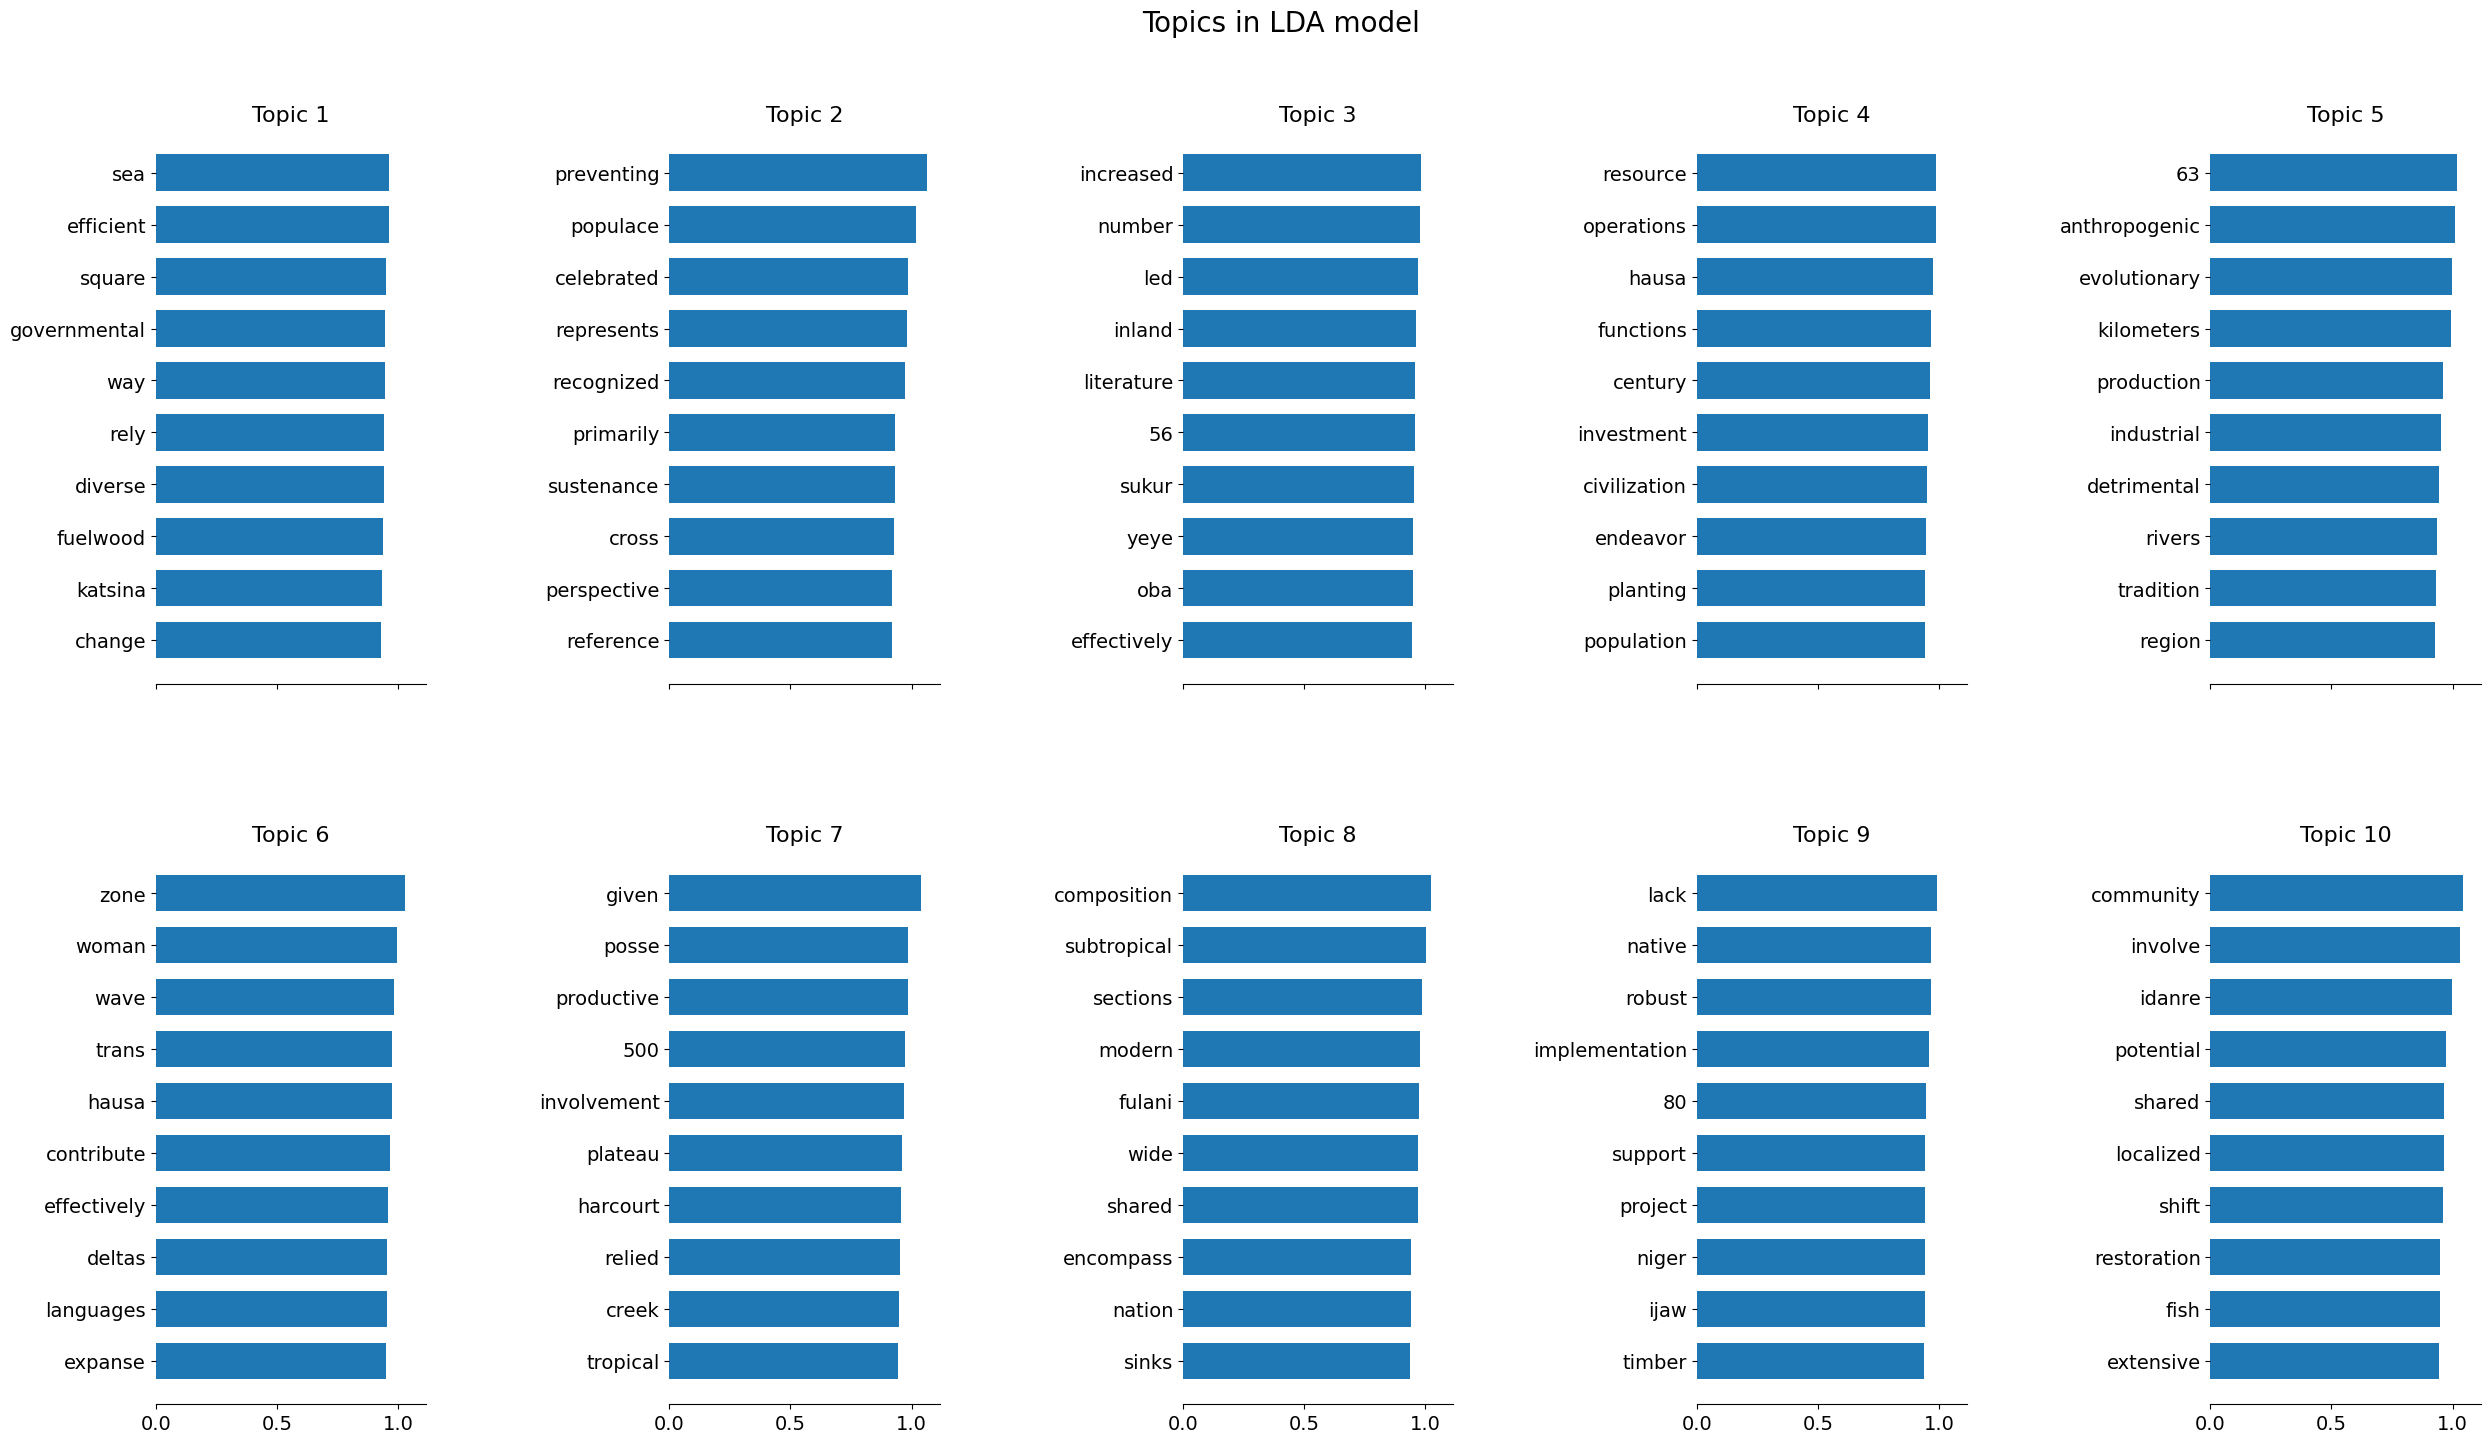

In [142]:
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}', fontsize=16)
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=14)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Define parameters
n_components = 10
n_top_words = 10

# Create and fit the LDA model
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(tf)

# Get feature names
tf_feature_names = tf_vectorizer.get_feature_names_out()

# Plot top words for each topic
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")


In [143]:
def plot_top_words_percentage(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        # Normalize weights to percentages
        weights_percentage = (weights / weights.sum()) * 100

        ax = axes[topic_idx]
        ax.barh(top_features, weights_percentage, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}', fontsize=16)
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=14)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


** **
#### CONCLUSION

In conclusion, the application of topic modeling techniques to Nigeria's cultural heritage offers profound insights into the multifaceted and dynamic nature of the country's rich cultural tapestry. Through the analysis of textual data, latent themes, patterns, and narratives emerge, shedding light on diverse aspects of Nigeria's cultural identity. The results of topic modeling provide valuable opportunities for exploration, interpretation, and preservation of Nigeria's cultural heritage.

By uncovering hidden connections and uncovering latent topics, researchers gain a deeper understanding of the linguistic, artistic, religious, culinary, and social dimensions of Nigeria's cultural landscape. These insights facilitate the documentation, promotion, and safeguarding of Nigeria's cultural heritage for future generations. Furthermore, the findings serve as a catalyst for interdisciplinary collaborations, community engagement, and policy interventions aimed at preserving and promoting Nigeria's diverse cultural heritage.

In essence, the utilization of topic modeling in the study of Nigeria's cultural heritage represents a significant advancement in our ability to unravel the complexities and nuances of this vibrant and diverse nation. By harnessing the power of data-driven approaches, we can celebrate, honor, and safeguard Nigeria's cultural legacy, ensuring its enduring relevance and vitality in an ever-changing world.


** **
#### References:
1. https://en.wikipedia.org/wiki/Culture_of_Nigeria
2. Topic model — Wikipedia. https://en.wikipedia.org/wiki/Topic_model
3. Topic Mapping — Software — Resources — Amaral Lab. https://amaral.northwestern.edu/resources/software/topic-mapping
4. A Survey of Topic Modeling in Text Mining. https://thesai.org/Downloads/Volume6No1/Paper_21-A_Survey_of_Topic_Modeling_in_Text_Mining.pdf
** **
#### Closing Notes
Machine learning has become increasingly popular over the past decade, and recent advances in computational availability have led to exponential growth to people looking for ways how new methods can be incorporated to advance the field of Natural Language Processing.

Often, we treat topic models as black-box algorithms, but hopefully, this notebook addressed to shed light on the underlying math, and intuitions behind it, and high-level code to get you started with any textual data.

In the next article, we’ll go one step deeper into understanding how you can evaluate the performance of topic models, tune its hyper-parameters to get more intuitive and reliable results.

** **
#### References:
1. Topic model — Wikipedia. https://en.wikipedia.org/wiki/Topic_model
2. Distributed Strategies for Topic Modeling. https://www.ideals.illinois.edu/bitstream/handle/2142/46405/ParallelTopicModels.pdf?sequence=2&isAllowed=y
3. Topic Mapping — Software — Resources — Amaral Lab. https://amaral.northwestern.edu/resources/software/topic-mapping
4. A Survey of Topic Modeling in Text Mining. https://thesai.org/Downloads/Volume6No1/Paper_21-A_Survey_of_Topic_Modeling_in_Text_Mining.pdf
